#Weather Image Classification using CNN in PyTorch.

In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

## DataSet Used

For this assignmente the folowing dataset was used:

Multi-class Weather Dataset for Image Classification
Published: 13-09-2018
|
Version 1
|
DOI:
10.17632/4drtyfjtfy.1
Contributor:
Gbeminiyi Ajayi.
Description.
Multi-class weather dataset(MWD) for image classification is a valuable dataset used in the research paper entitled “Multi-class weather recognition from still image using heterogeneous ensemble method”. The dataset provides a platform for outdoor weather analysis by extracting various features for recognizing different weather conditions. 

https://data.mendeley.com/datasets/4drtyfjtfy/1

The original dataset was modified for having a set of 32x32 images, and the same number of samples for each of four classes considered (cloudy, rain, shune and sunrise). This modified dataset can be downloaded from:

https://drive.google.com/file/d/13gxMPYy5saMKp4vrTnPdOb4VzSIRPvCf/view?usp=sharing


In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
! rm -rf ./data

In [15]:
!unrar x -inul "/content/gdrive/MyDrive/data/weather32.rar" "./data/"

In [17]:
if (os.path.isdir('./data/')):
  print("Data OK")

Data OK


In [22]:
data_dir = './data/weather'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['cloudy', 'rain', 'shine', 'sunrise']


In [24]:
shine_files = os.listdir(data_dir + "/train/shine")
print('No. of training examples for shine:', len(shine_files))
print(shine_files[:10])

No. of training examples for shine: 200
['shine86.jpg', 'shine183.jpg', 'shine67.jpg', 'shine148.jpg', 'shine89.jpg', 'shine106.jpg', 'shine137.jpg', 'shine94.jpg', 'shine91.jpg', 'shine13.jpg']


In [25]:
cloudy_files = os.listdir(data_dir + "/test/cloudy")
print('No. of test examples for cloudy:', len(cloudy_files))
print(cloudy_files[:5])

No. of test examples for cloudy: 15
['cloudy208.jpg', 'cloudy204.jpg', 'cloudy213.jpg', 'cloudy209.jpg', 'cloudy201.jpg']


In [26]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [27]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

In [32]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.3098, 0.2784, 0.3059,  ..., 0.5216, 0.5020, 0.5882],
         [0.4118, 0.4980, 0.5765,  ..., 0.5176, 0.6118, 0.7804],
         [0.5216, 0.6549, 0.7412,  ..., 0.5922, 0.7294, 0.9059],
         ...,
         [0.0863, 0.0863, 0.0824,  ..., 0.1882, 0.1882, 0.1882],
         [0.0784, 0.0784, 0.0745,  ..., 0.1804, 0.1804, 0.1804],
         [0.0706, 0.0706, 0.0706,  ..., 0.1765, 0.1765, 0.1804]],

        [[0.3098, 0.2784, 0.3059,  ..., 0.5216, 0.5020, 0.5882],
         [0.4118, 0.4980, 0.5765,  ..., 0.5176, 0.6118, 0.7804],
         [0.5216, 0.6549, 0.7412,  ..., 0.5922, 0.7294, 0.9059],
         ...,
         [0.0863, 0.0863, 0.0824,  ..., 0.1882, 0.1882, 0.1882],
         [0.0784, 0.0784, 0.0745,  ..., 0.1804, 0.1804, 0.1804],
         [0.0706, 0.0706, 0.0706,  ..., 0.1765, 0.1765, 0.1804]],

        [[0.3098, 0.2784, 0.3059,  ..., 0.5216, 0.5020, 0.5882],
         [0.4118, 0.4980, 0.5765,  ..., 0.5176, 0.6118, 0.7804],
         [0.5216, 0.6549, 0.7412,  ..., 0.5922, 0.7294, 0.

In [33]:
print(dataset.classes)

['cloudy', 'rain', 'shine', 'sunrise']


In [34]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [35]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  cloudy (0)


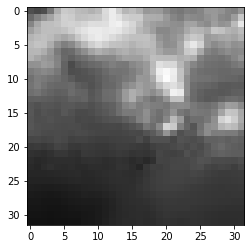

In [36]:
show_example(*dataset[0])

Label:  cloudy (0)


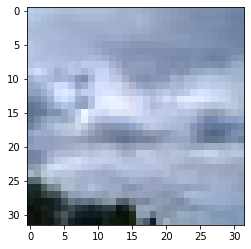

In [37]:
show_example(*dataset[1])

In [38]:
torch.device('cpu')

device(type='cpu')

In [39]:
random_seed = 42
torch.manual_seed(random_seed);

In [40]:
val_size = 100
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(700, 100)

In [41]:
from torch.utils.data.dataloader import DataLoader

batch_size=35

In [42]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [43]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=7).permute(1, 2, 0))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


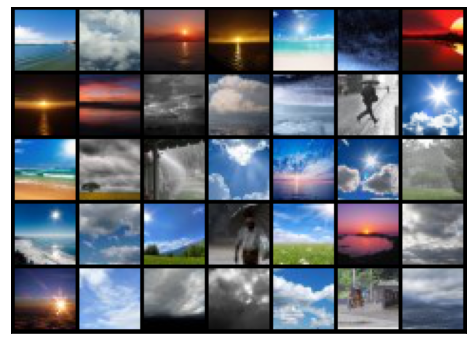

In [44]:
show_batch(train_dl)

Model Building

In [45]:
import torch.nn as nn
import torch.nn.functional as F

In [46]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

In [47]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([35, 3, 32, 32])
out.shape: torch.Size([35, 8, 16, 16])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Aplying the simple CNN model to an image it is transformed in a 8 chanel 16x16 pixels image.

#CNN model

In [48]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [51]:
# We'll use nn.Sequential to chain the layers and activations functions into a single network architecture.

class WeatherCnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
            
            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 4))
        
    def forward(self, xb):
        return self.network(xb)

In [52]:
model = WeatherCnnModel()
model

WeatherCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [53]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([35, 3, 32, 32])
out.shape: torch.Size([35, 4])
out[0]: tensor([-0.0013, -0.0160, -0.0500, -0.0258], grad_fn=<SelectBackward>)


To seamlessly use a GPU, if one is available, we define a couple of helper functions (get_default_device & to_device) and a helper class DeviceDataLoader to move our model & data to the GPU as required. These are described in more detail in the previous tutorial.

In [54]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [56]:
# Based on where you're running this notebook, your default device could be a CPU (torch.device('cpu')) or a GPU (torch.device('cuda'))
device = get_default_device()
device

device(type='cuda')

In [58]:
# We can now wrap our training and validation data loaders using DeviceDataLoader for automatically transferring batches of 
# data to the GPU (if available), and use to_device to move our model to the GPU (if available).
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

#Train the Model

In [59]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [60]:
model = to_device(WeatherCnnModel(), device)

In [61]:
evaluate(model, val_dl)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'val_acc': 0.23571428656578064, 'val_loss': 1.386814832687378}

The initial accuracy is around 23%, which is what one might expect from a randomly intialized model (since it has a 1 in 3 chance of getting a label right by guessing randomly).

We'll use the following hyperparmeters (learning rate, no. of epochs, batch_size etc.) to train our model. As an exercise, you can try changing these to see if you have achieve a higher accuracy in a shorter time.

In [69]:
num_epochs = 30
opt_func = torch.optim.Adam
lr = 0.00001

In [70]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 0.5133, val_loss: 0.4388, val_acc: 0.8238
Epoch [1], train_loss: 0.5094, val_loss: 0.4514, val_acc: 0.8548
Epoch [2], train_loss: 0.5001, val_loss: 0.4607, val_acc: 0.7762
Epoch [3], train_loss: 0.4964, val_loss: 0.4085, val_acc: 0.8024
Epoch [4], train_loss: 0.4906, val_loss: 0.4254, val_acc: 0.8214
Epoch [5], train_loss: 0.5096, val_loss: 0.4155, val_acc: 0.8286
Epoch [6], train_loss: 0.4942, val_loss: 0.4121, val_acc: 0.8167
Epoch [7], train_loss: 0.4877, val_loss: 0.4126, val_acc: 0.8238
Epoch [8], train_loss: 0.4921, val_loss: 0.4141, val_acc: 0.8095
Epoch [9], train_loss: 0.4797, val_loss: 0.4103, val_acc: 0.8238
Epoch [10], train_loss: 0.4778, val_loss: 0.4730, val_acc: 0.7976
Epoch [11], train_loss: 0.4805, val_loss: 0.4442, val_acc: 0.8381
Epoch [12], train_loss: 0.4874, val_loss: 0.4019, val_acc: 0.8167
Epoch [13], train_loss: 0.4794, val_loss: 0.4014, val_acc: 0.8238
Epoch [14], train_loss: 0.4799, val_loss: 0.4091, val_acc: 0.8238
Epoch [15], train_lo

In [71]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

Our model reaches an accuracy of around 75%, and by looking at the graph, it seems unlikely that the model will achieve an accuracy higher than 80% even after training for a long time. This suggests that we might need to use a more powerful model to capture the relationship between the images and the labels more accurately. This can be done by adding more convolutional layers to our model, or incrasing the no. of channels in each convolutional layer, or by using regularization techniques.

We can also plot the training and validation losses to study the trend.

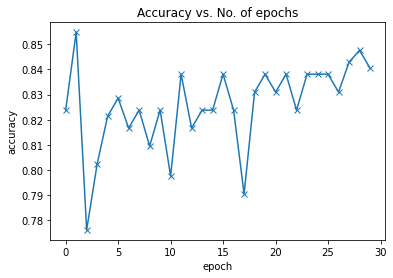

In [73]:
plot_accuracies(history)

In [74]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

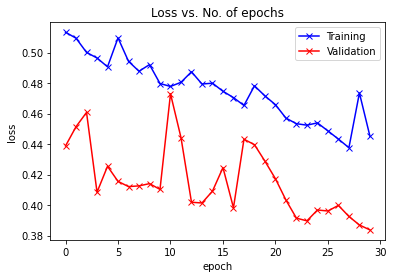

In [75]:
plot_losses(history)

## Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by creating a test dataset using the `ImageFolder` class.


In [76]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

Let's define a helper function predict_image, which returns the predicted label for a single image tensor.

In [78]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: cloudy , Predicted: cloudy


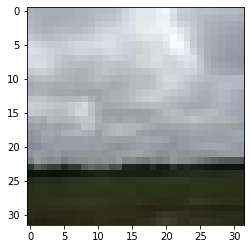

In [85]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: shine , Predicted: shine


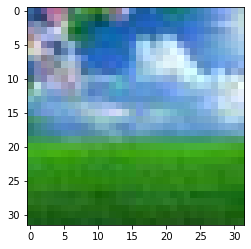

In [86]:
img, label = test_dataset[30]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: sunrise , Predicted: sunrise


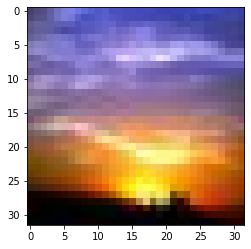

In [89]:
img, label = test_dataset[59]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set, and record using jovian. We expect these values to be similar to those for the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

In [90]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.8500000238418579, 'val_loss': 0.5118837952613831}